<a href="https://colab.research.google.com/github/Abu-Kowcher-Rmstu/Machine-Learning-/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [4]:
df=pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
X = df.drop(columns = 'target', axis=1)
y = df['target']

# Data splitting

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 2022,stratify=y)

In [10]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
def clac(y_test, y_pred, classifier):
  from sklearn.metrics import confusion_matrix
 
  print("Classifier name: ", classifier)
  print(classification_report(y_test, y_pred))

  #cm = confusion_matrix(y_pred.round(),y_test)
  cm = confusion_matrix(y_test,y_pred)
  cmd_obj = ConfusionMatrixDisplay(cm)
  cmd_obj.plot()


# Parameter Tuning

In [11]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes' :{
        'model': MultinomialNB(),
        'params':{
        }
    },

    'Decision_tree': {
        'model' : DecisionTreeClassifier(random_state =10),
        'params': { 
            'criterion': ['entropy','gini']
        }
    },

    'KNN': {
        'model' : KNeighborsClassifier(metric='minkowski',n_neighbors = 1),
        'params': { 
            #'n_neighbors': list(range(1,15,2)),
            'p': [1,2]
        }
    }
    
    
}


In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.981707,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.989024,{'n_estimators': 5}
2,logistic_regression,0.834146,{'C': 1}
3,naive_bayes,0.736585,{}
4,Decision_tree,0.993902,{'criterion': 'entropy'}
5,KNN,0.986585,{'p': 1}


# Training and comparison among the models

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.84 (0.048917)
test accuracy: 0.86
KNN: 0.98 (0.014481)
test accuracy: 0.99
DT: 0.99 (0.008181)
test accuracy: 1.00
RF: 0.99 (0.009525)
test accuracy: 1.00
MNB: 0.74 (0.037864)
test accuracy: 0.79
SVM: 0.84 (0.057148)
test accuracy: 0.88
SGD: 0.72 (0.060682)
test accuracy: 0.82


<ipython-input-14-28553082a249>:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


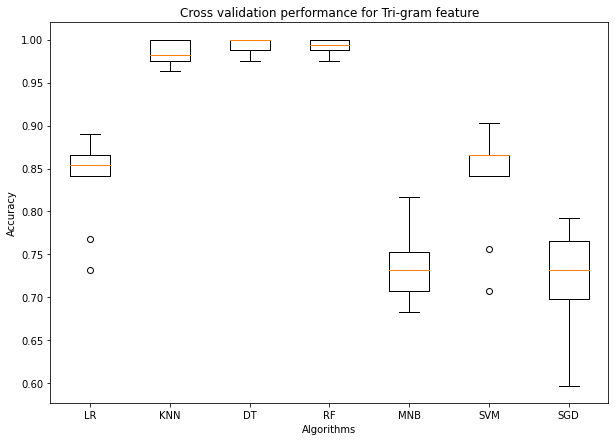

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as detailed_score

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('KNN', KNeighborsClassifier( n_neighbors =1, metric = 'minkowski', p=2)))
models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('RF', RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)))
models.append(('MNB', MultinomialNB()))
models.append(('SVM', SVC(kernel = 'linear',probability=True, random_state = 0)))
models.append(('SGD', SGDClassifier(loss="log", penalty="l2", max_iter=1000)))

# evaluate each model in turn
scores =[] 
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	#kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
  #print("training:{}".format(model))
  #print("CV score: {:0.2f}".format(cv_results.mean()))
  model.fit(X_train,y_train)
  test_accuracy = model.score(X_test,y_test)
  y_pred = model.predict(X_test)
  precision,recall,fscore,support=detailed_score(y_test,y_pred,average='macro')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %0.2f (%f)" % (name, cv_results.mean(), cv_results.std())
  #msg = "%s: %0.2f"% (name,test_accuracy)
  print(msg)
  print("test accuracy: {:0.2f}".format(test_accuracy))
  scores.append( 
      {
          'model': name,
          'cv_score': "%0.2f" %(cv_results.mean()),
          'test_score': "%0.2f" %(test_accuracy),
          'precision': "%0.2f" %(precision),
          'recall': "%0.2f" %(recall),
          'f1_score': "%0.2f" %(fscore),
             
      }
      
      )
# boxplot algorithm comparison
#plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
plt.title('Cross validation performance for Tri-gram feature')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#plt.savefig('result.png')


In [15]:
output_df = pd.DataFrame(scores,columns=['model','cv_score','test_score','precision','recall','f1_score'])

In [16]:
print("Comparison of models")
output_df

Comparison of models


,model,cv_score,test_score,precision,recall,f1_score
0,LR,0.84,0.86,0.87,0.86,0.86
1,KNN,0.98,0.99,0.99,0.98,0.99
2,DT,0.99,1.00,1.00,1.00,1.00
3,RF,0.99,1.00,1.00,1.00,1.00
4,MNB,0.74,0.79,0.79,0.79,0.79
5,SVM,0.84,0.88,0.89,0.88,0.88
6,SGD,0.72,0.82,0.86,0.82,0.82


# The best model: Logistic Regression

Classifier name:  Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       100
           1       0.82      0.94      0.88       105

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


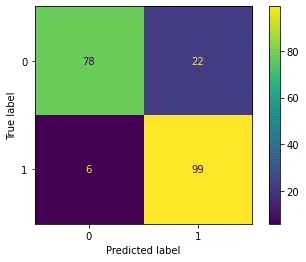

In [17]:


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C =1)
clf.fit(X_train,y_train)

# Prediction
y_pred = clf.predict(X_test)

######################### Evaluation Measures
#  Calculation
clac(y_test,y_pred, "Logistic Regression")